<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday October 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Bottom](#bot)

---

In [5]:
from scipy import stats
from random import randint
import random
from scipy.special import binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: Rubber Ducky Race

Every year, the Aspen Valley Rotary Club hosts a [rubber ducky race](https://www.aspenrotary.org/page/the-ducky-derby). Each Rubber Ducky is stamped with a number, tickets are sold  and if your ducky makes it to the end of the course first, you win. Exact Rules follow:

1. The Rotary Club sells "Duck Adoption" papers. Only Ducks that have been adopted start the race, so there must always be a winner.
2. The ducks are dumped into a river and race to a finish line. The adoptive parent of the first duck across the line wins. The standard prize is 15,000 dollars.
3. Before the start of the duck race, the Rotary Club randomly draws a number of special ducks. For every 3,333 ducks that start the race, 1 special duck is drawn.
4. If a special duck wins the race the prize is increased from 15,000 dollars to 1,000,000 dollars.

**Assume that all ducks are equally likely to win the ducky race.**

**Part A:**
Given that 9999 ducks start the race and you purchase 1 duck, calculate the probability by hand that your duck is selected as a special ducky.

Since one in every 3333 ducks is randomly selected to be a special duck, 3 special ducks will be selected. Therefore the probability yours is the special one is 3/9999 = 1/3333

**Part B:** Calculate the probability that the rotary club pays out the million dollar prize.

If each duck has an equal chance of winning and there are 3 special ducks, the probability of the million dollar prize is 3/9999 = 1/3333

**Part C:** Calculate the probability that your duck is both picked as a special duck and wins the race.

Since the two events are independent since the special duck has an equal chance of winning, your duck winning has a 1/9999 chance of winning, and a 1/3333 chance of being special, therefore the probability of both is $\frac{1}{3333*9999} = \frac{1}{33326667}$

**Part D:** Calculate the expected payout for the Rotary Club for a 9999 duck race. 

The probability of the million dollar prize is 3/9999 since 3 of the 9999 ducks are special. The probability of the 15000 dollar prize is 9996/9999 since the rest are normal and there must be a winner. Therefore the expected payout is $\frac{3 * 1,000,000}{9999} + \frac{15,000 * 9996}{9999} = 15295.53$

**Part E:** The Rotary Club takes out an insurance policy on having to pay the 1,000,000 dollar prize. They pay $500 per race to the insurance company. From your answer above, is this worth it? Explain. Is there any number of ducks that make the insurance policy a good deal? If it is not worth it, what's a reason the the Rotary Club might buy the policy anyways? 

Since the expected value they are paying is 15,295.53 per race, it is not worth it since they will pay 15,500 per race instead. If there are less than 3,333 ducks then no special duck will even run so it is definetly not worth it for values below 3,333. No matter the amount of ducks, the expected value will still be 15,295.53 if it is a multiple of 3,333. This is because the amount of special ducks proportionally rises with the amount of ducks, so the fraction for the expected value will always simplify to be $\frac{1,000,000}{3333} + \frac{15,000*3332}{3333} = 15295.53$ If There is not a multiple of 3,333, then it is still not worth it since the special duck will have less of a chance of winning since there are more normal ducks, meaning the expected value will go down. Therefore there is no amount of ducks that make the insurance policy worth it.

**Part F:** Write a python function that simulates a single duck race. It should use the api below and the class written for you. DO NOT CHANGE THE API OR THE ENUMERATED CLASS. The function should take the number of ducks that start the race in as a parameter, and return a tuple of the duck's number that won, and the type of winner that duck was. 

[E.g. (1522, <Types_Of_Winner.REGULAR: 0>) ] 

The duck numbers start at 1 and go until the number passed in (Eg. For 500 ducks, the ducks are numbered 1 to 500. No Duck is numbered 0).

In [5]:
from enum import Enum
#Dont change this. You should return a tuple of (int, Type_Of_Winner) in the function below. 
#The type of winner should be from this class. The int should represent the duck number of the winning duck.
#If you want more info about Enumerated Types in python: https://docs.python.org/3/library/enum.html
class Types_Of_Winner(Enum):
    REGULAR = 0
    SPECIAL = 1

#don't change this api. We will use a set of unit tests to test this. 
#This uses a default parameter. If you are unfamiliar with default parameters: 
#https://www.geeksforgeeks.org/default-arguments-in-python/ 
#Don't change the default parameter.
def rubber_Ducky_Race(number_Of_Ducks=3333):
    #YOUR IMPLEMENTATION HERE
    #Change the below to simulate a duck race.
    
    #1st
    winning_Duck_Number = np.random.randint(number_Of_Ducks) + 1
    #2nd
    specials = np.floor(number_Of_Ducks/3333)
    #3rd
    ducks = {i+1: Types_Of_Winner.REGULAR for i in range(number_Of_Ducks)}
    #4th
    while specials != 0:
        special = np.random.randint(number_Of_Ducks) + 1
        if ducks[special] != Types_Of_Winner.SPECIAL:
            ducks[special] = Types_Of_Winner.SPECIAL
            specials -= 1
    #5th
    type_Of_Winner = ducks[winning_Duck_Number]
    
    #you can change the variable names, but must return tuple of type (int, Types_Of_Winner)
    return (winning_Duck_Number, type_Of_Winner)

1st, my code picks the winning duck by selecting a random number from the number of ducks, since random is 0 based indexing it adds one to the number so its 1 through the number of ducks.<br>
2nd, my code figures out how many special ducks there will be based on the number of ducks.<br>
3rd, my code makes a dictionary of ducks where the key is their number and the value is their type of winner. The k is i+1 since the for loop is 0 based indexing and we don't want ducks at 0 through number of ducks - 1, we want 1 through number of ducks. The ducks are initially set to all be regular ducks.<br>
4th, my code goes through a while loop until the appropriate amount of special ducks are chosen based upon 2nd. Then in the while loop it first picks what number the special duck will be, and again since 0 based adds 1. Then it checks if that number is already a special duck. If it is run the while again. If it is not then it makes that duck to a special duck using the dictionary, and subtracts from the number of special ducks since one of them has been added. <br>
5th, my code stores the type of winner the winning duck is. <br>
It returns the winning ducks number and its type like it should.

**Part G:** Write a python function that takes in a number of duck races (num_Duck_Races) and a number of ducks per race (num_Ducks_Per_Race). The function should run the function you wrote in part F by passing the number of ducks to the function from part F. It should run the function from part F num_Duck_Races times, and record all the results. It then should calculate the amount of money the rotary club paid out in each race and return a list of the rotary club's payouts (integer values of dollars paid out). Don't change the API as we will be auto grading this.

In [6]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    #IMPLEMENTATION HERE
    #1st
    results = []
    for i in range(num_Duck_Races):
        results.append(rubber_Ducky_Race(num_Ducks_Per_Race))
    #2nd
    payout = []
    for i in results:
        if i[1] == Types_Of_Winner.SPECIAL:
            payout.append(1000000)
        else:
            payout.append(15000)
            
    #CHANGE RETURN VALUE TO BE LIST OF PAYOUTS FROM YOUR CODE IMPLEMENTED IN THIS FUNCTION
    return payout

1st, my code makes a list that stores all the data. Then it runs a for loop that calls rubber_Ducky_Race the number of races and passes it the number of ducks per race. It stores the results of the returned tuples in a list. <br>
2nd, my code makes a list that stores the payout of the rotary club. It then iterates through the list of results gotten in 1st and if the duck that one was Special it appends 1000000 to the list of payouts, if it was normal it appends 15000 to the list of payouts. <br>
It returns the list payout which holds the payout of each race.

**Part H:** Run the simulation function you made in part G 50 times for 1111 duck races each with 3333 ducks per race. Calculate the mean of each list of payouts returned by your function from part F and plot the mean payout values on a histogram. We recommend using the default bins argument here (don't pass it in). Make sure to make your histogram legible, label the plot, and label the x and the y axes (with their units). Do this all in one cell and run the cell a few times and see what different histograms are generated from the simulations. When you find one with three distinct "bars" leave it in the output of the cell. Explain why this histogram makes sense. Your answer here should talk about what each distinct "bar" in the histogram represents, the probabiity that the rotary club pays out the million dollar prize, and the number of races in each simulation. 

Text(0.5, 0, 'Mean of the 1111 races')

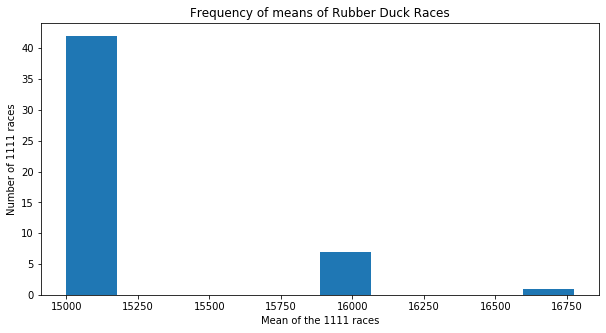

In [21]:
#code explained below histogram
#1st
means = []
for i in range(50):
    means.append(np.mean(run_Simulation_Duck_Race(1111,3333)))
#2nd
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(means)
ax.set_title("Frequency of means of Rubber Duck Races")
ax.set_ylabel("Number of 1111 races")
ax.set_xlabel("Mean of the 1111 races")

1st, my code calls the simulation method 50 times and stores the means of each call in a list. The simulation is passed 1111 races with 3333 ducks and returns the winnings of each race. <br>
2nd, my code makes a histogram of the mean data found in 1st. <br>
Each data point in the histogram represents out of 1111 races with 3333 ducks, how many times the million dollar prize was won. Each bar represents how many times the races only won regular, how many had two million dollar prizes, and how many had 1 million dollar prize. This makes sense because if you run 1111 races 50 times with 3333, most of the time no million dollar prize will be won, but every 3 on average will have 1 win, and very rarely two million dollar prizes will be given out. This is a condensed version of plotting $50*1111$ races each with 3333 ducks. The y axis is really just the number of races, and the x axis is how much money was given out on average at each race. If they run 1111 races each with 3333 ducks, then about 37/50 times they will be paying 15000 per race, 14/50 they will be paying around 15900 per race, and 2/50 they will be paying about 16600 per race. Since the number the number of 1111 races that had one win the million dollar prize based on the histogram is 14, and the number of 1111 races that had two win the million dollar prize is 2, the amount of one million dollar prizes given out per $50*1111$ races is 18. Which means that the probability of the million dollar prize is $\frac{18}{50*1111}$ from the histogram. These results closely align with the results found in the above parts, so it makes sense. But, I ran my whole notebook to make sure it worked and now I can't get a good histagram. It's pretty finicy, but on average I get about these probabilities. One really interesting histagram though was there was one where 1 won a million, 1 where 2 won a million, and 1 where 3 won a million all on the same set of simulations, crazy.

**Part I:** Pick a lucky number in between 1 and 7000 and run your function from part F 25000 times with 7,000 ducks. Capture all the results and find the number of times your duck won! Was your duck ever a winner or even a special Million Dollar Winner?

In [8]:
#1st
my_number = 3022
numOfRegWins = 0
numOfLuckyWins = 0
for i in range(25000):
    result = rubber_Ducky_Race(7000)
    if result[0] == my_number:
        if result[1] == Types_Of_Winner.SPECIAL:
            numOfLuckyWins += 1
        else:
            numOfRegWins += 1
print("Times I won 15,000:", numOfRegWins)
print("Times I won 1,000,000:", numOfLuckyWins)

Times I won 15,000: 4
Times I won 1,000,000: 0


The first time I ran it I won the 15,000 prize 4 times, and the 1,000,000 prize 0 times. However, of course if you run the simulation enough you can eventually get favorable resutls even though it is unlikely to win the 1,000,000 prize in only 25,000 races by the results found in the previous parts. I could never get a lucky winner and could at best get 7 15,000 prizes after a few runs.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2: Tax Fraud

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, we will decide whether this dataset is fraudulent. 



**Part A**:  Read in the data and create a variable that holds only the character of each data point.

In [6]:
data = pd.read_csv('tax.txt', sep="\t")
data["FirstDigit"] = data["taxIncomes"].astype(str).str[0]
data["FirstDigit"] = data["FirstDigit"].astype(int)
data.head()

,taxIncomes,FirstDigit
1,5601.0,5
2,4977.0,4
3,5959.0,5
4,6267.0,6
5,5221.0,5


My code uses pandas to first put all the data into a dataframe split by tabs since that is how the data is split in the file. It then takes the taxIncomes column, converts it to a string, and gets the first character in order to make a column that is the first digit of the taxIncomes. Then it puts it back in as an int so it can be used for plotting and data.

**Part B**: Create a histogram of the data that also plots or overlays the suggested non-fradulent density $f(x)$ as well as the density of the discrete uniform over the same support.

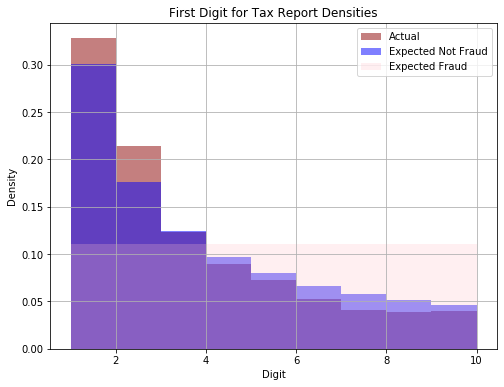

In [10]:
#1st
my_bins = range(1,11,1)
fig, ax = plt.subplots(figsize=(8,6))
data.hist(column="FirstDigit", ax=ax, bins=my_bins, density=True, fc = "darkred", alpha=0.5)
#2nd
def pdf(X):
    num = X+1
    num /= X
    return np.log10(num)
#3rd
distribution = [0]
for i in range(9):
    distribution.append(pdf(i+1))
#4th
dataframe = []
digit = 0
for j in distribution:
    i = 0.0
    while i < j:
        i += 0.001
        dataframe.append(digit)
    digit += 1
#5th
df = {'Digits': dataframe}
expectedDistribution = pd.DataFrame(data=df)
expectedDistribution.hist(column="Digits", ax=ax, bins=my_bins, density=True, fc="blue", alpha=0.5)
#6th
fradulent = [1,2,3,4,5,6,7,8,9]
df = {'Digits': fradulent}
fradulentData = pd.DataFrame(data=df)
fradulentData.hist(column="Digits", ax=ax, bins=my_bins, density=True, fc="pink", alpha=0.25)
#7th
ax.legend(["Actual", "Expected Not Fraud", "Expected Fraud"])
ax.set_ylabel("Density")
ax.set_xlabel("Digit")
ax.set_title("First Digit for Tax Report Densities")
plt.show()

1st, my code takes the data from part A and puts it into a histogram.<br>
2nd, I made a function to calculate the frequency using the pdf for what the data should be if it is not fradulent. <br>
3rd, I made an array to hold how often the digit shows up in a non fradulent account, doing so by using the pdf function from 2nd. <br>
4th, I took the data from the array from 3rd to make a giant dataframe where each letter is put in as many times as it should have shown up out of 1000 entries, creating a dataFrame that represents a non fradulent account. <br>
5th, I made a histogram of the fake non fradulent account so it can be compared to the actual account. <br>
6th, I created a dataFrame that uses the fradulent uniform distribution to make a fradulent account. I then made a histogram of this fake fradulent account in order to compare it to the actual account and the fake non fradulent account. <br>
7th, I set the labels, titles, and display the histograms together.

**Part C**: Does it appear as those the data is fraudulent, not fraudulent, or too hard to tell?  What kind of numerical measures could you use to support such a conclusion?

It appears as though it isn't fradulent since it is much closer to the fake fradulent acccount then it is to the fake fradulent account. Some numerical measures you could use are take the deviation of the two, ie how far the actual and non fradulent differ, you could also take the expected value of both and see how far apart they are.

**Part D**: Create a new object that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  Repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

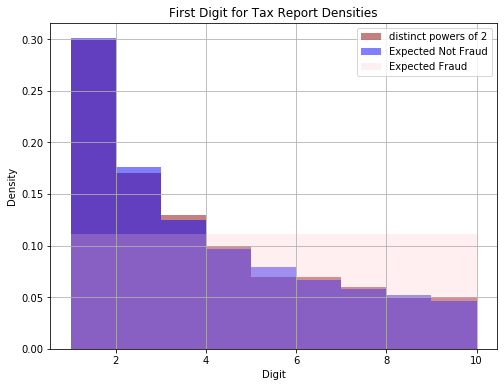

In [11]:
#1st
powers = []
for i in range(100):
    f = (i+1)*1.0
    powers.append(np.power(2,f))
#2nd
i=1
while i < len(powers):
    while powers[i] >= 10:
        powers[i] /= 10
        powers[i] = np.floor(powers[i])
    i += 1
#3rd
df = {'Digits': powers}
sndPower = pd.DataFrame(data=df)
#4th
fig, ax = plt.subplots(figsize=(8,6))
sndPower.hist(column="Digits", ax=ax, bins=my_bins, density=True, fc="darkred", alpha=0.5)
expectedDistribution.hist(column="Digits", ax=ax, bins=my_bins, density=True, fc="blue", alpha=0.5)
fradulentData.hist(column="Digits", ax=ax, bins=my_bins, density=True, fc="pink", alpha=0.25)
#5th
ax.legend(["distinct powers of 2", "Expected Not Fraud", "Expected Fraud"])
ax.set_ylabel("Density")
ax.set_xlabel("Digit")
ax.set_title("First Digit for Tax Report Densities")
plt.show()

It's really cool and weird that they come out so similar. I was expecting something random and weird. This totally looks like it would not be a fradulent account.<br>
1st, my code makes a list that holds of the distinct powers of two. <br>
2nd, my code iterates through the list of distinct powers and divides by 10 until they are in the single digits in order to get the first digit of the number.<br>
3rd, my code makes the data from 2nd into a dataFrame.<br>
4th, I make a density histogram of the dataFrame in order to see what the distinct powers of 2's digits look like, and then also plot the uniform distribution and the fake non fradulent account made in part B. <br>
5th, I label the axises and graph and display it all together so that the information can be compared.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Poker

It's time to play poker.  (https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values) Assume that we are using a standard deck of cards without jokers (52 cards). For each round, you will be dealt 5 cards from the deck without replacement. There are several different types of hands that can be dealt; listed below are a few of interest: 

- Highcard (Simple value of the card. Lowest: 2 - Highest: Ace)
- Pair (Two cards with the same value)
- Two pair (Twice two cards with the same value)
- Three of a kind (Three cards with the same value)
- Straight (Sequence of 5 cards in increasing value, Ace can only follow K)
- Four of a kind (Four cards with the same value)
- Full house (Three of a kind and a pair)
- Flush (5 cards of the same suit)

**Part A**: What is the exact probability you get at least a Pair in your 5 cards? What is the probability of getting a Full House?  (Note that we're including pairs as a subset of a full house, here)

The probability you get at least a pair means that out of the 5 cards you draw, at least 2 of them are the same. i.e. you can draw 2 to 4 of the same card and no others repeat, 2 of one 2 of another, 2 of one 3 of another. Calculating the probability of that though is really complicated and I can't figure it out so instead we are going to do 1 - the probability you didn't get a pair which is the same thing. The probability you didn't get a pair is the propability that none of them are the same which is $\frac{52}{52}*\frac{48}{51}*\frac{44}{50}*\frac{40}{49}*\frac{36}{48}$ because each time you are drawing one card and there are 3 other cards that could be that so each draw you subtract 4 from the numerator. The denominator is just how many cards are left. Therefore the final probability is $1-\frac{52}{52}*\frac{48}{51}*\frac{44}{50}*\frac{40}{49}*\frac{36}{48} = .492917.$ <br>
The probability of a full house is the probability you draw a card, times the probability you draw that same card twice, then that you draw a different card, and draw that card again. Which looks like $\frac{52}{52}*\frac{3}{51}*\frac{2}{50}*\frac{48}{49}*\frac{3}{48}$ since your multiplying them all the order doesn't matter since the numerator and denominator will always equal the same thing, but there are still 10 ways to do this so the final probability for a full house is $\frac{52}{52}*\frac{3}{51}*\frac{2}{50}*\frac{48}{49}*\frac{3}{48}*10 = 0.0014406$.

**Part B**: Write a function `getCards()` to randomly generate 5 cards from the no-joker deck. This function should return an array of 5 cards.

In [12]:
def getCards():
    #1st
    deck = ["AD","2D", "3D", "4D", "5D", "6D", "7D", "8D", "9D", "10D", "JD", "QD", "KD",
            "AC","2C", "3C", "4C", "5C", "6C", "7C", "8C", "9C", "10C", "JC", "QC", "KC",
            "AS","2S", "3S", "4S", "5S", "6S", "7S", "8S", "9S", "10S", "JS", "QS", "KS",
            "AH","2H", "3H", "4H", "5H", "6H", "7H", "8H", "9H", "10H", "JH", "QH", "KH"]
    #2nd
    choices = []
    i=0
    while i < 5:
        choice = np.random.choice(deck)
        if choice not in choices:
            choices.append(choice)
            i += 1
    return choices

1st, I made an array of all the possible cards.<br>
2nd, I use a while loop to pick cards until 5 are chosen. The if statement is to ensure that no duplicates are drawn. <br>

**Part C**: Run the `getCards()` simulation 10000 times, and store the result in an array named `card_array`.

In [13]:
#1st
card_array = []
#2nd
for i in range(10000):
    card_array.append(getCards())

1st, I make the array that stores the info.<br>
2nd, I run a for loop that calls the method 10,000 times and stores the array returned each time into an array.<br>

**Part D**: Write a function `pair(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of have Pair? Does the result agree with your calculation in Part A?

In [14]:
def pair(card_array, num_sim):
    #1st
    numPairs = 0.0
    #2nd
    for i in card_array:
        #3rd
        j = 0
        notPair = True
        #4th
        while j < len(i)-1 and notPair:
            #5th
            f=j+1
            while f < len(i) and notPair:
                #6th
                if i[j][0] == i[f][0]:
                    numPairs += 1
                    notPair = False
                f += 1
            j += 1
    #7th
    return numPairs/num_sim
print("Probability of a pair is:", pair(card_array, 10000))

Probability of a pair is: 0.4938


1st, my code creates an integer that represents how many of the 5 draw sets have a pair.<br>
2nd, my code iterates through the sets of 5 card draws.<br>
3rd, my code creates a variable that will be how many of the elements in the 5 card array we have gone through, and sets a boolean initialy to false that represents whether or not a pair has been found in this set of 5 cards. <br>
4th, my code iterates through the cards in the 5 card set.<br>
5th, my code iterates through the cards in the 5 card set after the one it is currently on in order to see if any of the elements are a match.<br>
6th, my code checks to see if the element in 4th is equal to the element in 5th, by only comparing the first character since suits don't matter for a pair. i.e. if there is AS and AD in the set then since both have an A it adds that to the total amount of hands that have a pair and breaks out of the loops to check the next hand. This would be probablimatic for 10 since it is two digits, but since there isn't a 1 it only returns true when both are 10 so therefore it doesn't matter that we only look at the first character.<br>
7th, my code finds the probability by dividing how many hands have pairs by how many hands there are.<br>
The probability of a pair stays around about 0.49 which is what I got for the calculated probability.

**Part E:** Write a function `fullhouse(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of having a Full House? Does the result agree with your calculation in Part A?

In [15]:
def fullhouse(card_array, num_sim):
    #1st
    numFull = 0.0
    #2nd
    for i in card_array:
        #3rd
        ele = 0
        one = 1
        two = 1
        #4th
        j=1
        while j < len(i):
            if i[0][0] == i[j][0]:
                one += 1
            j += 1
        #5th
        j=1
        while j < len(i):
            if i[j][0] != i[0][0] and ele == 0:
                ele = j
            j += 1
        #6th
        j=1
        while j < len(i):
            if i[j][0] == i[ele][0] and j != ele:
                two += 1
            j += 1
        #7th
        if one == 3 and two == 2:
            numFull += 1
        if one == 2 and two == 3:
            numFull += 1
    #8th
    return numFull/num_sim
print("The probability of a full house is:", fullhouse(card_array, 10000))

The probability of a full house is: 0.0013


1st, I make a variable to keep track of how many hands have had a full house. <br>
2nd, I iterate through every hand.<br>
3rd, I keep track of how many of the two cards there are in order to make sure there are 3 of one type and 2 of another, also ele is the first index of a card different from what one equals so I can store the value of two. <br>
4th, I iterate through the list and add one to one for every card that equals one in the hand in order to see how many match the first element therefore getting how many cards are the same as the first. <br>
5th, I get the first card that is different from the card in the first spot so I can see how many matches there will be to the element not equal to the first card.<br>
6th, I see how many elements are equal to the card that's different from the first and increment two if there is a match.<br>
7th, the above code will have how many of one card there are, and how many of the other card, therefore if there are 3 of one and 2 of the other then we have a full house. This bit checks to see if there is 3 of one and 2 of the other and adds to the number of full houses we have.<br>
8th, In order to get the probability I return how many full houses there are divided by how many total hands there are.<br>
The result varies from about 0.0021 to 0.0012 which is a wide range so it's probably off due to too small of a sample size. However it does kind of stick around 0.0014 so I guess it's not too bad. It's also such a small number that it makes since it would vary easily. 

In [17]:
# calculating confidence interval
z = stats.norm.ppf(0.025)
mean = 390
std = 42
n = 36
lower = mean + (z*std/np.sqrt(n))
upper = mean - (z*std/np.sqrt(n))
print("lower bound: ", lower)
print("upper bound: ", upper)

lower bound:  376.2802521082196
upper bound:  403.7197478917804
